In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


C:\Users\Justin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# df = pd.read_excel("combinedData.xlsx")
dfTest = pd.read_csv('rawData.csv')
df = pd.read_csv('Fortnite.csv')
df = df.rename(index=str, columns={"Which quadrant did you land in? Use map below for reference": "Location", "Which game mode were you in?": "Mode","What place did you finish? (Example: 4)": "Position", "How many kills did you get? (Example: 7)": "KillCount"})

In [4]:
df.head()

,,,,<<<<<<< HEAD
Timestamp,Which quadrant did you land in? Use map below for reference,Which game mode were you in?,What place did you finish? (Example: 4),How many kills did you get? (Example: 7)
2018/03/05 7:16:09 PM EST,D5,Solo,6,8
2018/03/05 7:43:32 PM EST,G2,Solo,1,3
2018/03/05 7:44:48 PM EST,F8,Solo,6,3
2018/03/05 7:54:54 PM EST,A9,Solo,5,7


In [6]:
df = df.drop('Timestamp', axis = 1)

ValueError: labels ['Timestamp'] not contained in axis

In [10]:
df.isnull().any()

<<<<<<< HEAD    True
dtype: bool

In [11]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)
dfTest.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Mode'

In [12]:
df = df[["Location", "KillCount", "Position", "Mode"]]

# df["KillCount"] = np.cos(2*np.pi*df.KillCount/100)
# df["Position"] = np.cos(2*np.pi*df.Position/100)
# df["Mode"] =  np.cos(2*np.pi*df.Position/3)

KeyError: "['Location' 'KillCount' 'Position' 'Mode'] not in index"

In [97]:
df.loc[df["Position"] > 82]

,Location,KillCount,Position,Mode
136,D5,3,85,1
214,A3,0,99,1
215,B7,0,99,1
281,A5,2,99,0
451,E4,0,88,0
487,C3,1,93,0


In [98]:
df3 = pd.concat([df, dfTest])

In [99]:
df =df3

In [100]:
df=df.drop([20])

In [101]:
df.loc[df['Mode'] == "SQUAD "]
df.loc[df["Position"] > 82]

,Location,KillCount,Position,Mode
136,D5,3,85,1
214,A3,0,99,1
215,B7,0,99,1
281,A5,2,99,0
451,E4,0,88,0
487,C3,1,93,0
51,F7,0,91,0
84,H6,0,89,0
262,D5,3,85,1
340,A3,0,99,1


(-1, 10)

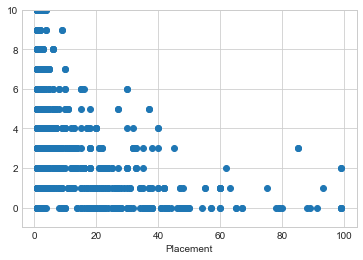

In [102]:
import seaborn as sns

plt.scatter((df["Position"]),(df["KillCount"]))
# plt.ylabel()
plt.xlabel("Placement")
plt.ylim(-1,10)



Text(0.5,0,'Placement')

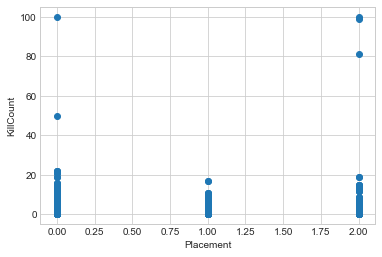

In [103]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Placement")

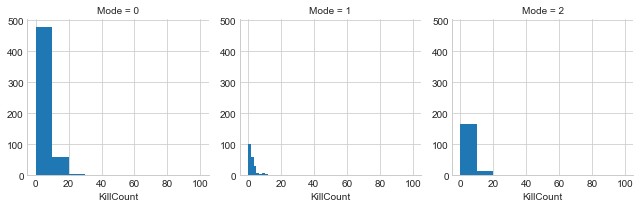

In [104]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

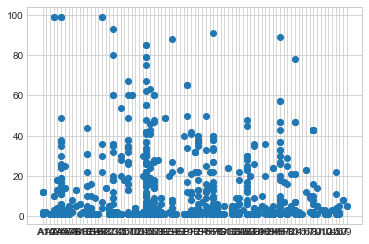

In [105]:
plt.scatter( df["Location"],df["Position"])

In [106]:
# multiples = sns.FacetGrid(df, col = "Location")
# multiples = multiples.map(plt.hist, "Position")

In [107]:
import statsmodels.api as sm

Y = df["Position"]
X = df[["KillCount", "Mode"]]

model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Position   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           2.54e-27
Time:                        23:28:53   Log-Likelihood:                -4135.3
No. Observations:                 942   AIC:                             8275.
Df Residuals:                     940   BIC:                             8284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount      0.0166      0.079      0.210      0.8

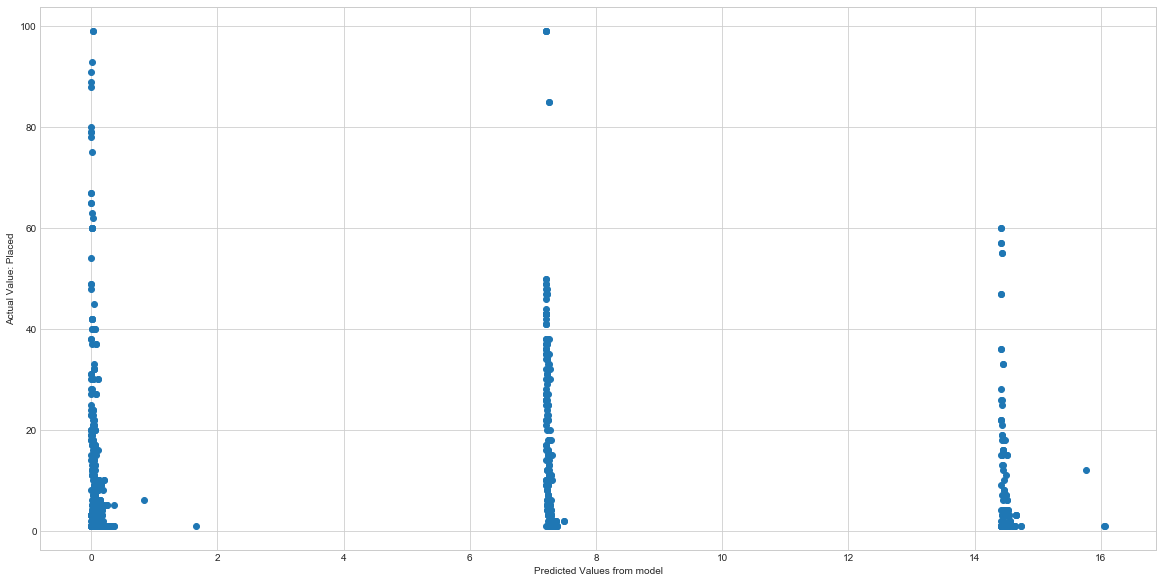

In [108]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Placed")
plt.show()

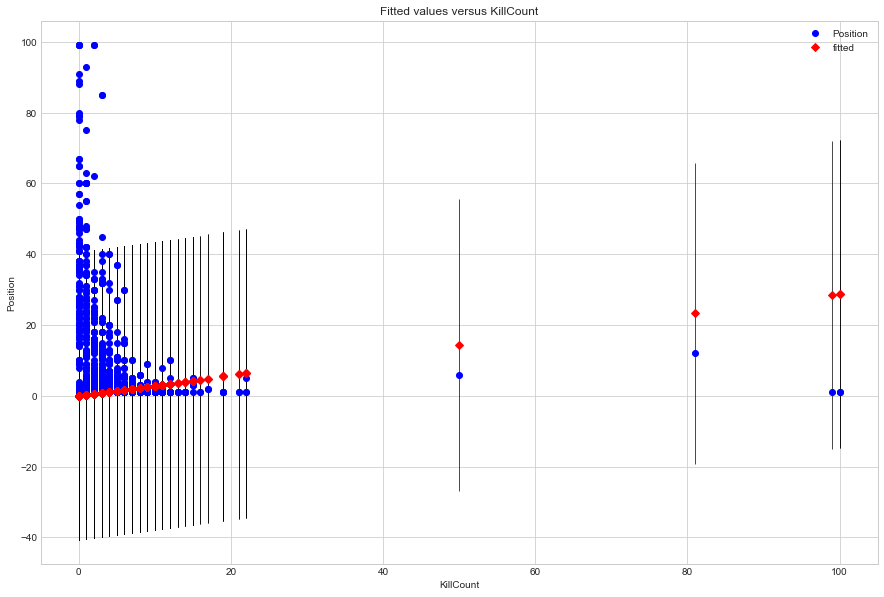

In [109]:
X = df["KillCount"]
Y = df["Position"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [110]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

In [111]:
from scipy.optimize import curve_fit

In [112]:
def func(x, a, b, c):
    d  = np.array(a * np.exp(-b * x) + c, dtype=np.float64)
    return d

In [114]:
X_train

426     1
139     0
370     3
108     2
346     3
275     8
255     2
339     3
341     0
275     3
153     0
7       7
408     8
40      3
258    11
409     1
341     5
225     2
360    12
417     6
269     4
489     3
501     2
311     2
146     6
179     5
267     0
42      2
306     4
123     3
       ..
254     2
146     4
130     7
86      4
35      0
431     3
65      2
208     3
205     3
44      1
27      2
80      1
437     0
113     6
404     5
204     1
11      0
213    12
163     5
117     2
411     3
236     4
233     4
8       5
73      3
400     2
118    17
194     4
206     3
360     4
Name: KillCount, Length: 753, dtype: int64

/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


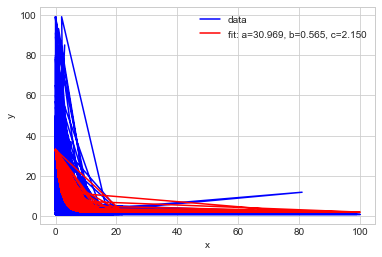

In [128]:
plt.plot(X_train, Y_train, 'b-', label='data')

plt.plot(X_train, func(X_train, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, X_train, Y_train)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [129]:
popt

array([30.96878416,  0.56522076,  2.14971828])

In [153]:
yhat = popt[2]+ popt[0]*np.exp(-popt[1] * X_test)

In [154]:
res = yhat -Y_test

In [155]:
np.mean(res)

-0.6069913386287774

(-1, 50)

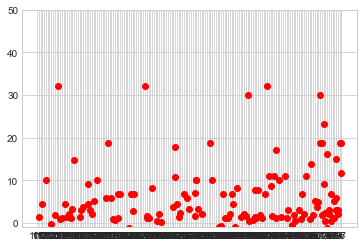

In [156]:
plt.plot(res,'ro')
plt.ylim(-1,50)

In [157]:
relativeRes = res/Y_test

(-1, 1.5)

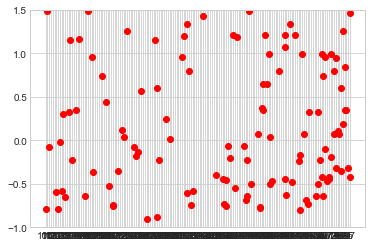

In [158]:
plt.plot(relativeRes,'ro')
plt.ylim(-1,1.5)

In [159]:
np.mean(relativeRes)

2.5804876379970243

(0, 100)

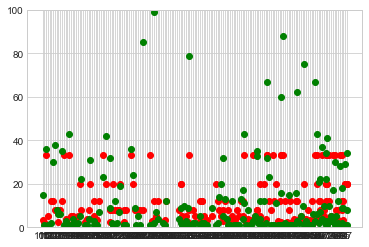

In [160]:
plt.plot(yhat, 'ro')
plt.plot(Y_test, 'go')
plt.ylim(0,100)

In [161]:
np.max(yhat)

33.11850243527299